In [12]:
import pandas as pd
import Clean_data
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree,model_selection
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
Clean_data.clean_data(train_df)


train_df["new_age"] = np.array(train_df["Age"])
n_age = train_df["new_age"]
n_age_scaled = preprocessing.scale(nage)
n_age_scaled.mean(axis =0 )
n_age_scaled.std(axis =0 )
train_df["new_age"] = nage_scaled

train_df["new_fare"] = np.array(train_df["Fare"])
n_fare = train_df["new_fare"]
n_fare_scaled = preprocessing.scale(nage)
n_fare_scaled.mean(axis =0 )
n_fare_scaled.std(axis =0 )
train_df["new_fare"] = n_fare_scaled

y = train_df["Survived"].values
X = train_df[["Pclass","new_age","Sex","SibSp","Parch","Embarked","new_fare"]].values
#print(train_df.new_age.values)

dc_tree=tree.DecisionTreeClassifier(random_state = 0)
dc_ = dc_tree.fit(X,y)
print(dc_.score(X,y))

score = model_selection.cross_val_score(dc_tree , X,y,scoring='accuracy' , cv=50)
print("After removing overfitting score is " + str(score.mean()))


dc_tree=tree.DecisionTreeClassifier(random_state = 1 , max_depth =7 , min_samples_split=2)
dc_ = dc_tree.fit(X,y)
print(dc_.score(X,y))

score = model_selection.cross_val_score(dc_tree , X,y,scoring='accuracy' , cv=50)
print("After removing overfitting score is " + str(score.mean()))

######################################################################################################################











0.9248035914702581
After removing overfitting score is 0.8059477124183004
0.8608305274971941
After removing overfitting score is 0.8173856209150325


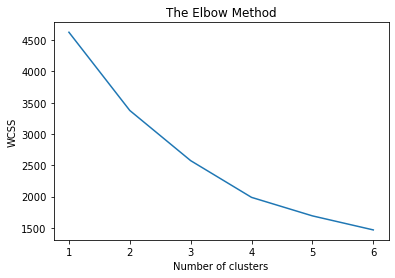

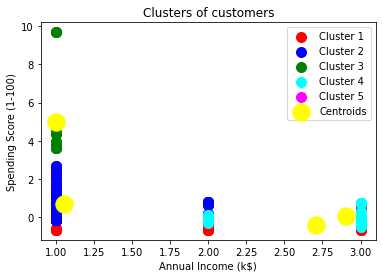

In [14]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()